# Reading data & libraries, data cleaning

In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
vi_map=pd.read_csv ('/Users/ghfmhf/git/data-question-2-xtreme-united/vi_map_df.csv')
vi_desc=pd.read_csv ('/Users/ghfmhf/git/data-question-2-xtreme-united/vi_desc_matches.csv')

In [60]:
seasonv={
    1:'winter',
    2:'winter',
    3:'spring',
    4:'spring',
    5:'spring',
    6:'summer',
    7:'summer',
    8:'summer',
    9:'fall',
    10:'fall',
    11:'fall',
    12:'winter'
}

In [61]:
# Eliminate non-used columns
vi_map_filter=vi_map.drop(['Unnamed: 0','Property Address', 'Property APN','State', 'Property Owner', 'Reported Problem', 'Last Activity', 'Violations Noted', 'Mapped Location', 'text','master_category', 'lat_lng', 'lat', 'lng'],1)

In [62]:
# vi_map_filter.head(5)

# number of claims in each category

In [63]:
# Group claims by category and count each group (numbers that go into the first chart)
vi_cat_cnt=vi_map_filter.groupby(by='category',as_index=False).count()

In [64]:
# vi_cat_cnt.columns

In [65]:
# Keep only the two columns needed for the first chart
vi_cat_cnt=vi_cat_cnt.drop(['Date Received', 'City', 'ZIP', 'Complaint Source',
       'Status', 'Council District', 'Last Activity Date',
       'Last Activity Result'],1)

In [66]:
# vi_cat_cnt

In [67]:
# label the columns 
vi_cat_cnt.columns=['cat','freq']

In [68]:
# vi_cat_cnt

In [69]:
# assign number of the categories to X
x=np.arange(0,vi_cat_cnt['cat'].count())

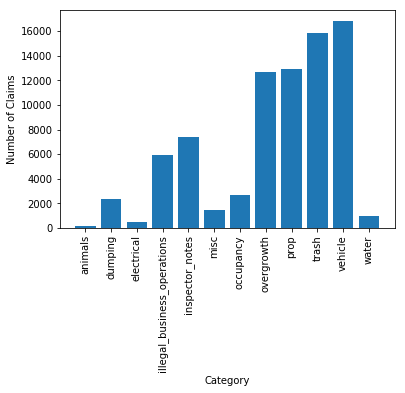

In [70]:
# drawing charts and labels
plt.bar(x,np.array(vi_cat_cnt['freq']))
plt.ylabel('Number of Claims')
plt.xlabel('Category')
plt.xticks(x,vi_cat_cnt['cat'],rotation=90)
plt.savefig('/Users/ghfmhf/git/data-question-2-xtreme-united/Chart_1.png')
plt.show()

# distribution of claims over seasons

In [71]:
vi_map_filter['Month']=pd.to_numeric(vi_map_filter['Date Received'].str[:2]) #pick the month
vi_map_filter['Season']=(((vi_map_filter['Month']%12)//3))

# vi_map_filter

In [72]:
vi_cat_sn=vi_map_filter.drop(['Date Received', 'City', 'ZIP',
       'Complaint Source', 'Status', 'Council District', 'Last Activity Date',
       'Last Activity Result', 'Month'],1)

In [73]:
# vi_cat_sn.head(3)

In [74]:
vi_cat_sn.columns

Index(['Request #', 'category', 'Season'], dtype='object')

In [75]:
vi_catsn=vi_cat_sn.groupby(by=['category','Season'],as_index=False).count()


In [76]:
vi_catsn.columns=['cat','season','freq']
# vi_catsn.head(3)

In [81]:
#creating pivot
vi_catsn_pvt=vi_catsn.pivot(index='season',columns='cat',values='freq').fillna(0)
vi_catsn_pvt

cat,animals,dumping,electrical,illegal_business_operations,inspector_notes,misc,occupancy,overgrowth,prop,trash,vehicle,water
season,,,,,,,,,,,,
0,27,458,107,1307,1239,264,556,171,2394,3591,3685,187
1,50,636,119,1716,1338,422,831,3692,3822,4428,4313,281
2,54,640,125,1573,2583,413,724,6461,3745,4421,4639,317
3,40,628,119,1339,2253,320,604,2374,3009,3436,4211,208


In [82]:
cat_lab=np.array(vi_catsn['cat'].drop_duplicates())
cat_lab

array(['animals', 'dumping', 'electrical', 'illegal_business_operations',
       'inspector_notes', 'misc', 'occupancy', 'overgrowth', 'prop',
       'trash', 'vehicle', 'water'], dtype=object)

In [83]:
sn_lab=np.array(vi_cat_sn['Season'].drop_duplicates())
# sn_lab

In [84]:
# Variables needed for stackbar
x=np.arange(0,vi_catsn_pvt.shape[1])

y0=np.array(vi_catsn_pvt.iloc[0,:])
y1=np.array(vi_catsn_pvt.iloc[1,:])
y2=np.array(vi_catsn_pvt.iloc[2,:])
y3=np.array(vi_catsn_pvt.iloc[3,:])


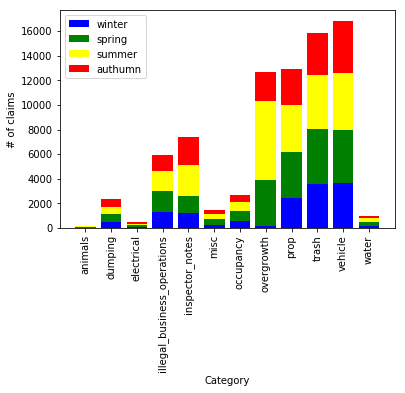

In [85]:
b0=plt.bar(x,y0,color='blue',label='winter') #winter
b1=plt.bar(x,y1,bottom=y0,color='green',label='spring') #spring
b2=plt.bar(x,y2,bottom=y1+y0,color='yellow',label='summer') #summer
b3=plt.bar(x,y3,bottom=y2+y1+y0,color='red',label='authumn')#authumn

plt.xlabel('Category')
plt.ylabel('# of claims')
plt.xticks(x,cat_lab,rotation=90)
plt.savefig('/Users/ghfmhf/git/data-question-2-xtreme-united/Chart_2.png')

plt.legend()
plt.show()

# Number of claims among regions

In [27]:
vi_map_filter.columns

Index(['Request #', 'Date Received', 'City', 'ZIP', 'Complaint Source',
       'Status', 'Council District', 'Last Activity Date',
       'Last Activity Result', 'category', 'Month', 'Season'],
      dtype='object')

In [28]:
vi_zip=vi_map_filter.drop(['Date Received', 'City', 'Complaint Source',
       'Status', 'Council District', 'Last Activity Date',
       'Last Activity Result', 'Month', 'Season'],1)
vi_zip['ZIP']=vi_zip['ZIP'].fillna(36900)

In [29]:
vi_ZZ=vi_zip['ZIP'].replace(0,36900) #for unknown ZIP codes
vi_zip['ZIP']=vi_ZZ

In [30]:
vi_zip['reg']=(vi_zip['ZIP']//100)-369
    
vi_zip.head(3)

,Request #,ZIP,category,reg
0,15-1114246,37208.0,prop,3.0
1,17-1153010,37207.0,prop,3.0
2,17-1153720,37013.0,prop,1.0


In [31]:
vi_catzp=vi_zip.groupby(by=['category','reg'],as_index=False).count()
vi_catzp.columns=['cat','reg','freq','zip']
vi_catzp.head(5)


,cat,reg,freq,zip
0,animals,0.0,3,3
1,animals,1.0,38,38
2,animals,2.0,22,22
3,animals,3.0,108,108
4,dumping,0.0,11,11


In [32]:
#creating pivot
vi_catzp_pvt=vi_catzp.pivot(index='reg',columns='cat',values='freq').fillna(0)
vi_catzp_pvt

cat,animals,dumping,electrical,illegal_business_operations,inspector_notes,misc,occupancy,overgrowth,prop,trash,vehicle,water
reg,,,,,,,,,,,,
0.0,3,11,6,50,40,51,10,124,70,111,117,3
1.0,38,473,59,923,1197,204,572,2243,2389,2999,4110,154
2.0,22,207,62,713,687,153,284,1598,2540,2069,1934,122
3.0,108,1671,343,4249,5489,1011,1849,8733,7971,10697,10687,714


In [33]:
cat_lab=np.array(vi_catzp['cat'].drop_duplicates())
cat_lab

array(['animals', 'dumping', 'electrical', 'illegal_business_operations',
       'inspector_notes', 'misc', 'occupancy', 'overgrowth', 'prop',
       'trash', 'vehicle', 'water'], dtype=object)

In [34]:
zp_lab=np.array(vi_zip['reg'].drop_duplicates())

In [35]:
#Variables needed for 2nd stackbar

x=np.arange(0,vi_catsn_pvt.shape[1])

y0=np.array(vi_catzp_pvt.iloc[0,:])
y1=np.array(vi_catzp_pvt.iloc[1,:])
y2=np.array(vi_catzp_pvt.iloc[2,:])
y3=np.array(vi_catzp_pvt.iloc[3,:])

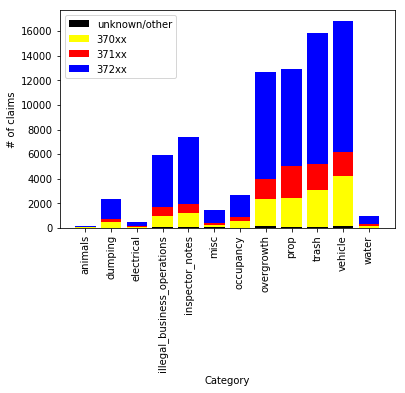

In [36]:
b0=plt.bar(x,y0,color="black",label='unknown/other') #unknown
b1=plt.bar(x,y1,bottom=y0,color='yellow',label='370xx') #371xx
b2=plt.bar(x,y2,bottom=y1+y0,color="red",label='371xx') #372xx
b3=plt.bar(x,y3,bottom=y2+y1+y0,color='blue',label='372xx')#373xx

plt.xlabel('Category')
plt.ylabel('# of claims')
plt.xticks(x,cat_lab,rotation=90)
plt.savefig('/Users/ghfmhf/git/data-question-2-xtreme-united/Chart_3.png')

plt.legend()
plt.show()

# Complain method over time

In [37]:
vi_map_filter.columns
vi_src=vi_map_filter.drop(['City', 'ZIP',
       'Status', 'Council District', 'Last Activity Date',
       'Last Activity Result', 'category', 'Month', 'Season'],1)
vi_src.head(5)

,Request #,Date Received,Complaint Source
0,15-1114246,02/11/2015,INSPECTOR REPORTED
1,17-1153010,02/10/2017,PHONE
2,17-1153720,03/01/2017,INSPECTOR REPORTED
3,17-1159789,06/12/2017,PHONE
4,17-1154177,03/10/2017,INSPECTOR REPORTED


In [38]:
vi_src['year']=pd.to_numeric(vi_src['Date Received'].str[-4:]) #pick the month
vi_src['Complaint Source']=vi_src['Complaint Source'].str.lower()
vi_src['Complaint Source']=vi_src['Complaint Source'].str.replace(' ','_')
vi_src.head(10)

,Request #,Date Received,Complaint Source,year
0,15-1114246,02/11/2015,inspector_reported,2015
1,17-1153010,02/10/2017,phone,2017
2,17-1153720,03/01/2017,inspector_reported,2017
3,17-1159789,06/12/2017,phone,2017
4,17-1154177,03/10/2017,inspector_reported,2017
5,16-1144860,08/15/2016,phone,2016
6,17-1155441,04/12/2017,phone,2017
7,17-1155118,04/04/2017,email,2017
8,17-1160868,06/27/2017,phone,2017
9,17-1156404,04/28/2017,phone,2017


In [39]:
vi_src_g=vi_src.groupby(by=['Complaint Source','year'],as_index=False).count()
vi_src_g.columns=['src','year','freq','date']
vi_src_g=vi_src_g.drop(['date'],1)
vi_src_g.head(5)

,src,year,freq
0,cal,2016,18
1,cal,2017,50
2,codes_online,2016,804
3,codes_online,2017,1618
4,community_matters,2015,39


In [40]:
vi_src_pvt=vi_src_g.pivot(index='src',columns='year',values='freq').fillna(0)
vi_src_pvt


year,2014,2015,2016,2017
src,,,,
cal,0.0,0.0,18.0,50.0
codes_online,0.0,0.0,804.0,1618.0
community_matters,0.0,39.0,33.0,0.0
email,430.0,6211.0,7246.0,5828.0
incidents_converted_from_old_system,0.0,0.0,6.0,1.0
inspector_reported,386.0,4826.0,6416.0,13864.0
mail,1.0,29.0,49.0,39.0
metro_council,0.0,0.0,52.0,164.0
metro_pd,0.0,0.0,62.0,52.0


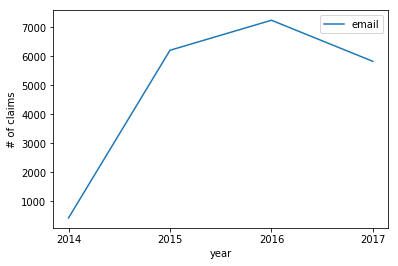

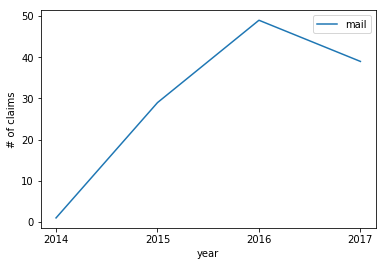

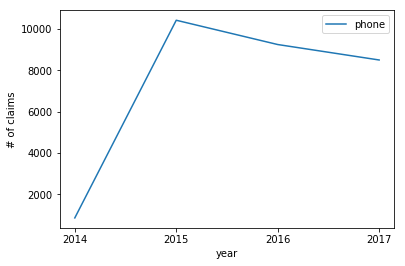

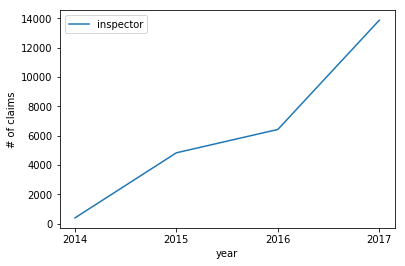

In [41]:
x=np.arange(0,vi_src_pvt.shape[1])
y_em=np.array(vi_src_pvt.iloc[3,:])
y_m=np.array(vi_src_pvt.iloc[6,:])
y_ph=np.array(vi_src_pvt.iloc[14,:])
y_in=np.array(vi_src_pvt.iloc[5,:])

b0=plt.plot(x,y_em,label='email') 
plt.xlabel('year')
plt.ylabel('# of claims')
plt.xticks(x,[2014,2015,2016,2017])
plt.savefig('/Users/ghfmhf/git/data-question-2-xtreme-united/Chart_5em.png')
plt.legend()
plt.show()

b1=plt.plot(x,y_m,label='mail') 
plt.xlabel('year')
plt.ylabel('# of claims')
plt.xticks(x,[2014,2015,2016,2017])
plt.savefig('/Users/ghfmhf/git/data-question-2-xtreme-united/Chart_5m.png')
plt.legend()
plt.show()

b2=plt.plot(x,y_ph,label='phone') 
plt.xlabel('year')
plt.ylabel('# of claims')
plt.xticks(x,[2014,2015,2016,2017])
plt.savefig('/Users/ghfmhf/git/data-question-2-xtreme-united/Chart_5p.png')
plt.legend()
plt.show()

b3=plt.plot(x,y_in,label='inspector') 
plt.xlabel('year')
plt.ylabel('# of claims')
plt.xticks(x,[2014,2015,2016,2017])
plt.savefig('/Users/ghfmhf/git/data-question-2-xtreme-united/Chart_5i.png')
plt.legend()
plt.show()

# number of claims in category; within cities-do this later
#### Use the first 3 digits of ZIP codes

In [96]:
vi_map_filter.head(10)
vi_map_filter['City']=vi_map_filter['City'].str.replace('ANTICOH','ANTIOCH')  # a typo accidentally noticed
vi_map_filter['City']=vi_map_filter['City'].str.replace(' ','_')
vi_map_filter['City']=vi_map_filter['City'].str.lower()

In [97]:
# Group claims by category and count each group (numbers that go into the first chart)
vi_cat_cty=vi_map_filter.groupby(by=['category','City'],as_index=False).count()

In [98]:
#removing columns that are not needed for pivot
vi_cat_cty=vi_cat_cty.drop(['Date Received', 'ZIP', 'Complaint Source',
                            'Status', 'Council District', 'Last Activity Date','Last Activity Result','Month','Season'],1)

In [99]:
vi_cat_cty

,category,City,Request #
0,animals,antioch,19
1,animals,brentwood,4
2,animals,goodlettsville,3
3,animals,hermitage,10
4,animals,joelton,2
5,animals,madison,15
6,animals,nashville,108
7,animals,old_hickory,7
8,dumping,antioch,353
9,dumping,brentwood,2


In [100]:
charts=sns.FacetGrid(vi_cat_cty, col="year")
charts=charts.map(plt.hist,"freq", bins=1 )

KeyError: 'year'